In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Problem 5

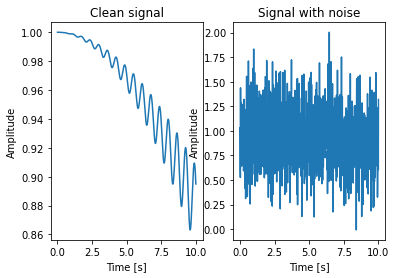

In [2]:
# Create signal
N = 1000
t = np.linspace(0, 10, N)
s = (np.cos(8 *np.pi * (t / N) + 0.5 * np.sin(16 * np.pi * t / N) + .1*np.sin(20 * np.pi * t / N)*np.sin(10*t))) 
n = 0.3*np.random.randn(N)
#n = 1*np.random.randn(N)

f = s + n #observations



plt.subplot(1, 2, 1)
plt.title("Clean signal")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)


plt.subplot(1, 2, 2)
plt.title("Signal with noise")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, f)

plt.show()

In [123]:
# Signal noise
P_s = np.linalg.norm(s)
P_n = np.linalg.norm(n)

SNR_db = 10*np.log(P_s/P_n)

print(SNR_db)

11.821766662209734


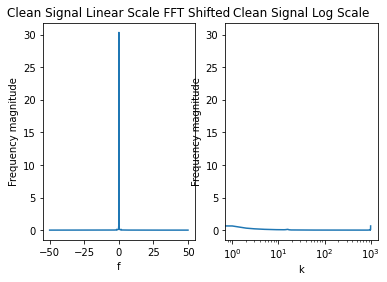

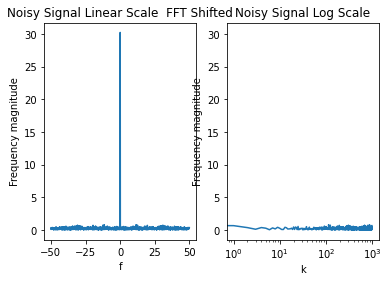

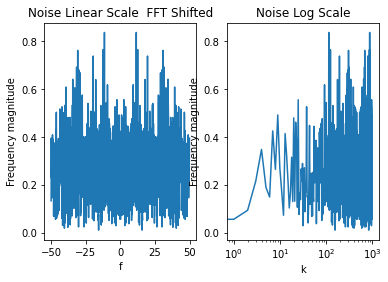

In [3]:
# Compute the FFT
s_hat = np.fft.fft(s, norm="ortho")
f_hat = np.fft.fft(f, norm="ortho")
n_hat = np.fft.fft(n, norm="ortho")

# Get some measure of frequency intervals
T = t[1] - t[0]  # sampling interval 

# 1/T = frequency
# Highest f_0 signal frequency we can represent is f_s / 2
fs_shifted = np.linspace(-1/(2*T), 1/(2*T), N)
k = np.linspace(0,N-1,N)  # f = k/(N*T)

plt.subplot(1, 2, 1)
plt.title("Clean Signal Linear Scale FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(s_hat)))
#plt.plot(fs_shifted,(np.fft.fftshift(s_hat)))  # wrong way to plot because s_hat is complex
plt.subplot(1, 2, 2)
plt.title("Clean Signal Log Scale")
plt.xscale('log')
plt.ylabel("Frequency magnitude")
plt.xlabel("k")
plt.plot(k,np.abs(s_hat))
plt.show()

plt.subplot(1, 2, 1)
plt.title("Noisy Signal Linear Scale  FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(f_hat)))
plt.subplot(1, 2, 2)
plt.title("Noisy Signal Log Scale")
plt.xscale('log')
plt.ylabel("Frequency magnitude")
plt.xlabel("k")
plt.plot(k,np.abs(f_hat))
plt.show()

plt.subplot(1, 2, 1)
plt.title("Noise Linear Scale  FFT Shifted")
plt.ylabel("Frequency magnitude")
plt.xlabel("f")
plt.plot(fs_shifted,np.abs(np.fft.fftshift(n_hat)))
plt.subplot(1, 2, 2)
plt.title("Noise Log Scale")
plt.xscale('log')
plt.ylabel("Frequency magnitude")
plt.xlabel("k")
plt.plot(k,np.abs(n_hat))
plt.show()

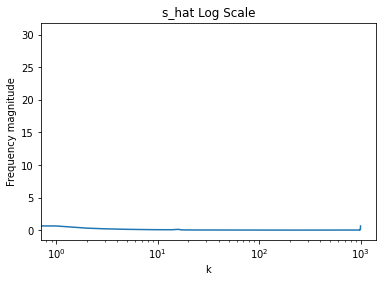

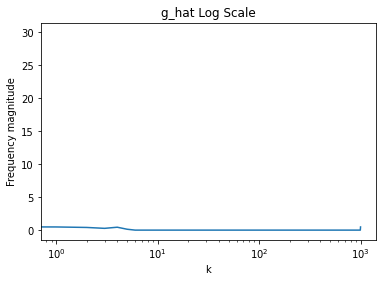

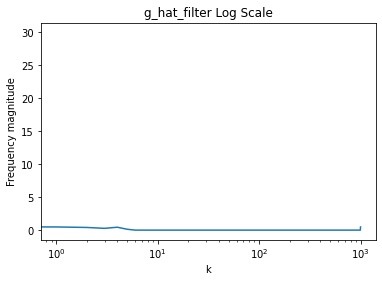

In [125]:
#k_0 = 1
#k_0 = 3
#k_0 = 5
#k_0 = 10
k_0 = 5


# Denoise
g_hat = f_hat
g_hat[k_0+1 : N-k_0] = 0


# Filter Version
h_hat = np.ones(N)
h_hat[k_0+1 : N-k_0] = 0

g_hat_filter = f_hat*h_hat

plt.title("s_hat Log Scale")
plt.xscale('log')
plt.ylabel("Frequency magnitude")
plt.xlabel("k")
plt.plot(k,np.abs(s_hat))
plt.show()

plt.title("g_hat Log Scale")
plt.xscale('log')
plt.ylabel("Frequency magnitude")
plt.xlabel("k")
plt.plot(k,np.abs(g_hat))
plt.show()

plt.title("g_hat_filter Log Scale")
plt.xscale('log')
plt.ylabel("Frequency magnitude")
plt.xlabel("k")
plt.plot(k,np.abs(g_hat_filter))
plt.show()

Imaginary Error: 8.206034893341228e-18
SNR: 35.10454626903231


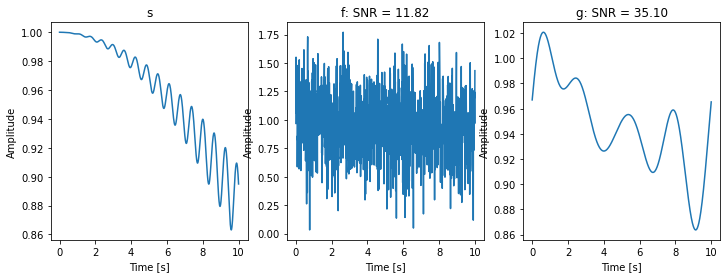

In [126]:
g = np.fft.ifft(g_hat_filter, norm="ortho")

# Technically g now has a complex part, even though its magnitude is very small.  Can zero out
imaginary_error = np.linalg.norm(np.imag(g))/np.linalg.norm(g)
print('Imaginary Error:',imaginary_error)
g = np.real(g)

# Compute SNR
P_noisefromg = np.linalg.norm(s - g)

SNR_g = 10*np.log(P_s/P_noisefromg)

print('SNR:',SNR_g)

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.title("s")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)

plt.subplot(1, 3, 2)
plt.title("f: SNR = %2.2f" %SNR_db)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, f)

plt.subplot(1, 3, 3)
plt.title("g: SNR = %2.2f" %SNR_g)
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, g)

plt.show()


This is much cleaner than the noisy signal but I feel like I'm not quite capturing the detail of the oscilitory trend of the original signal

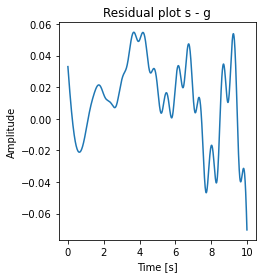

In [131]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.title("Residual plot s - g")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s - g)

## Problem 6

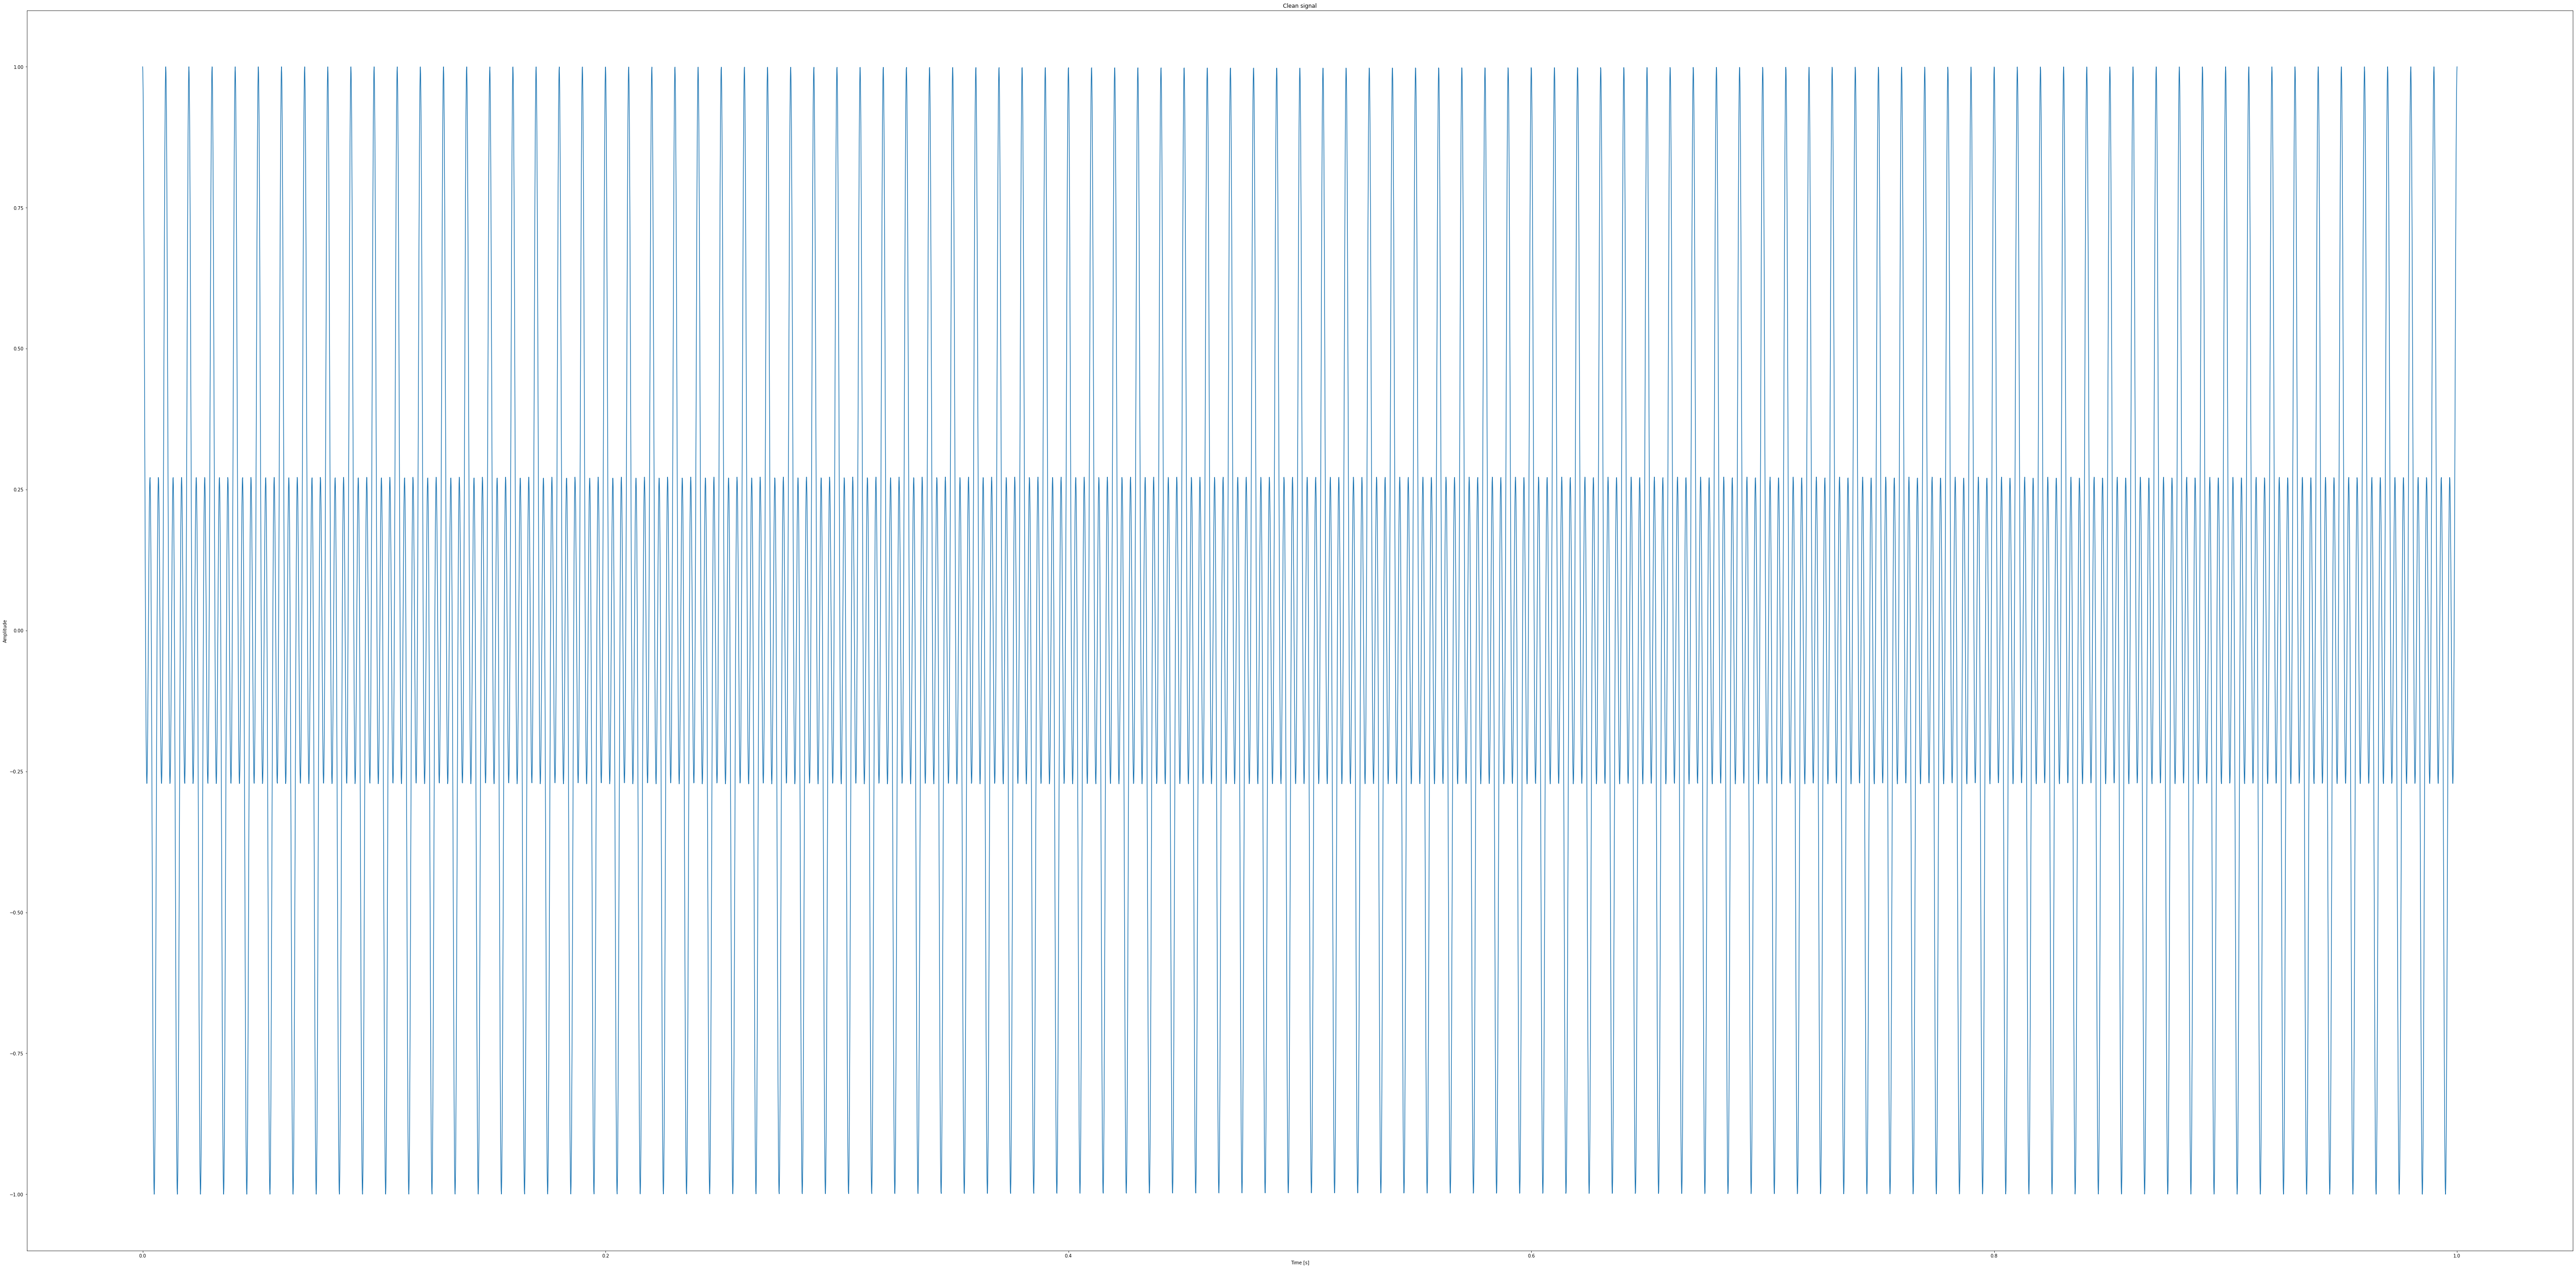

In [118]:
# Create signal
N_3 = 10000
t_3 = np.linspace(0, 1, N_3)
s_3 = np.cos(400 *np.pi * t_3) * np.cos(200 * np.pi * t_3)
#n = 0.3*np.random.randn(N)
#n = 1*np.random.randn(N)

#f = s + n #observations


plt.figure(figsize=(100, 50))
plt.title("Clean signal")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t_3, s_3)

plt.show()

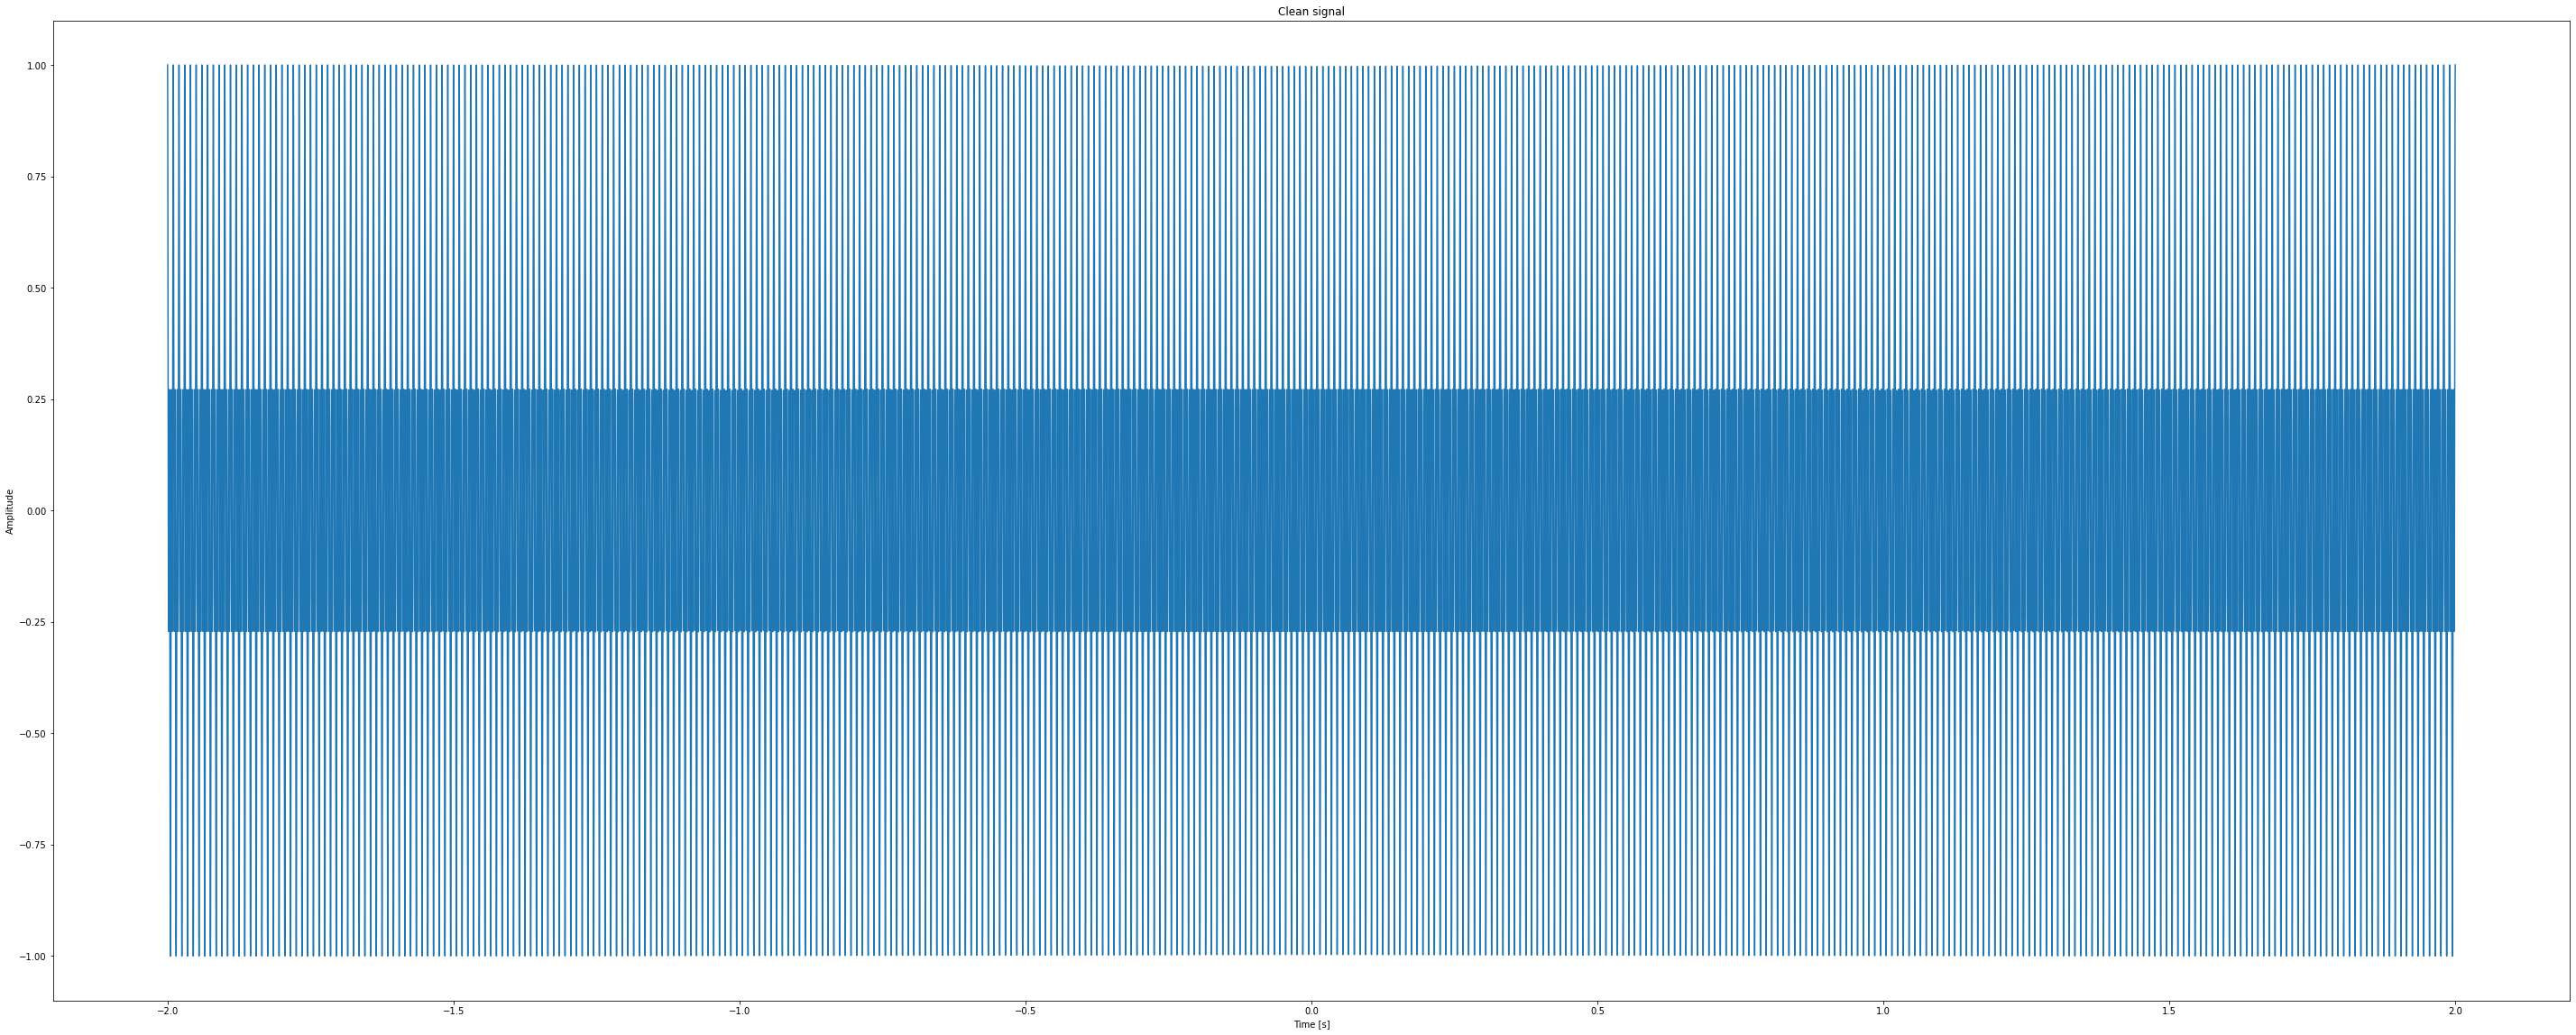

In [145]:
t_2 = np.linspace(-2, 2, 4 * 8600)

# Create signal
N = 10000
s_2 = np.cos(400 *np.pi * t_2) * np.cos(200 * np.pi * t_2)
#n = 0.3*np.random.randn(N)
#n = 1*np.random.randn(N)

#f = s + n #observations


plt.figure(figsize=(50, 20))
plt.title("Clean signal")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t_2, s_2)

plt.show()

In [ ]:
h = np.sinc(  * (n - (N - 1) / 2))

10001

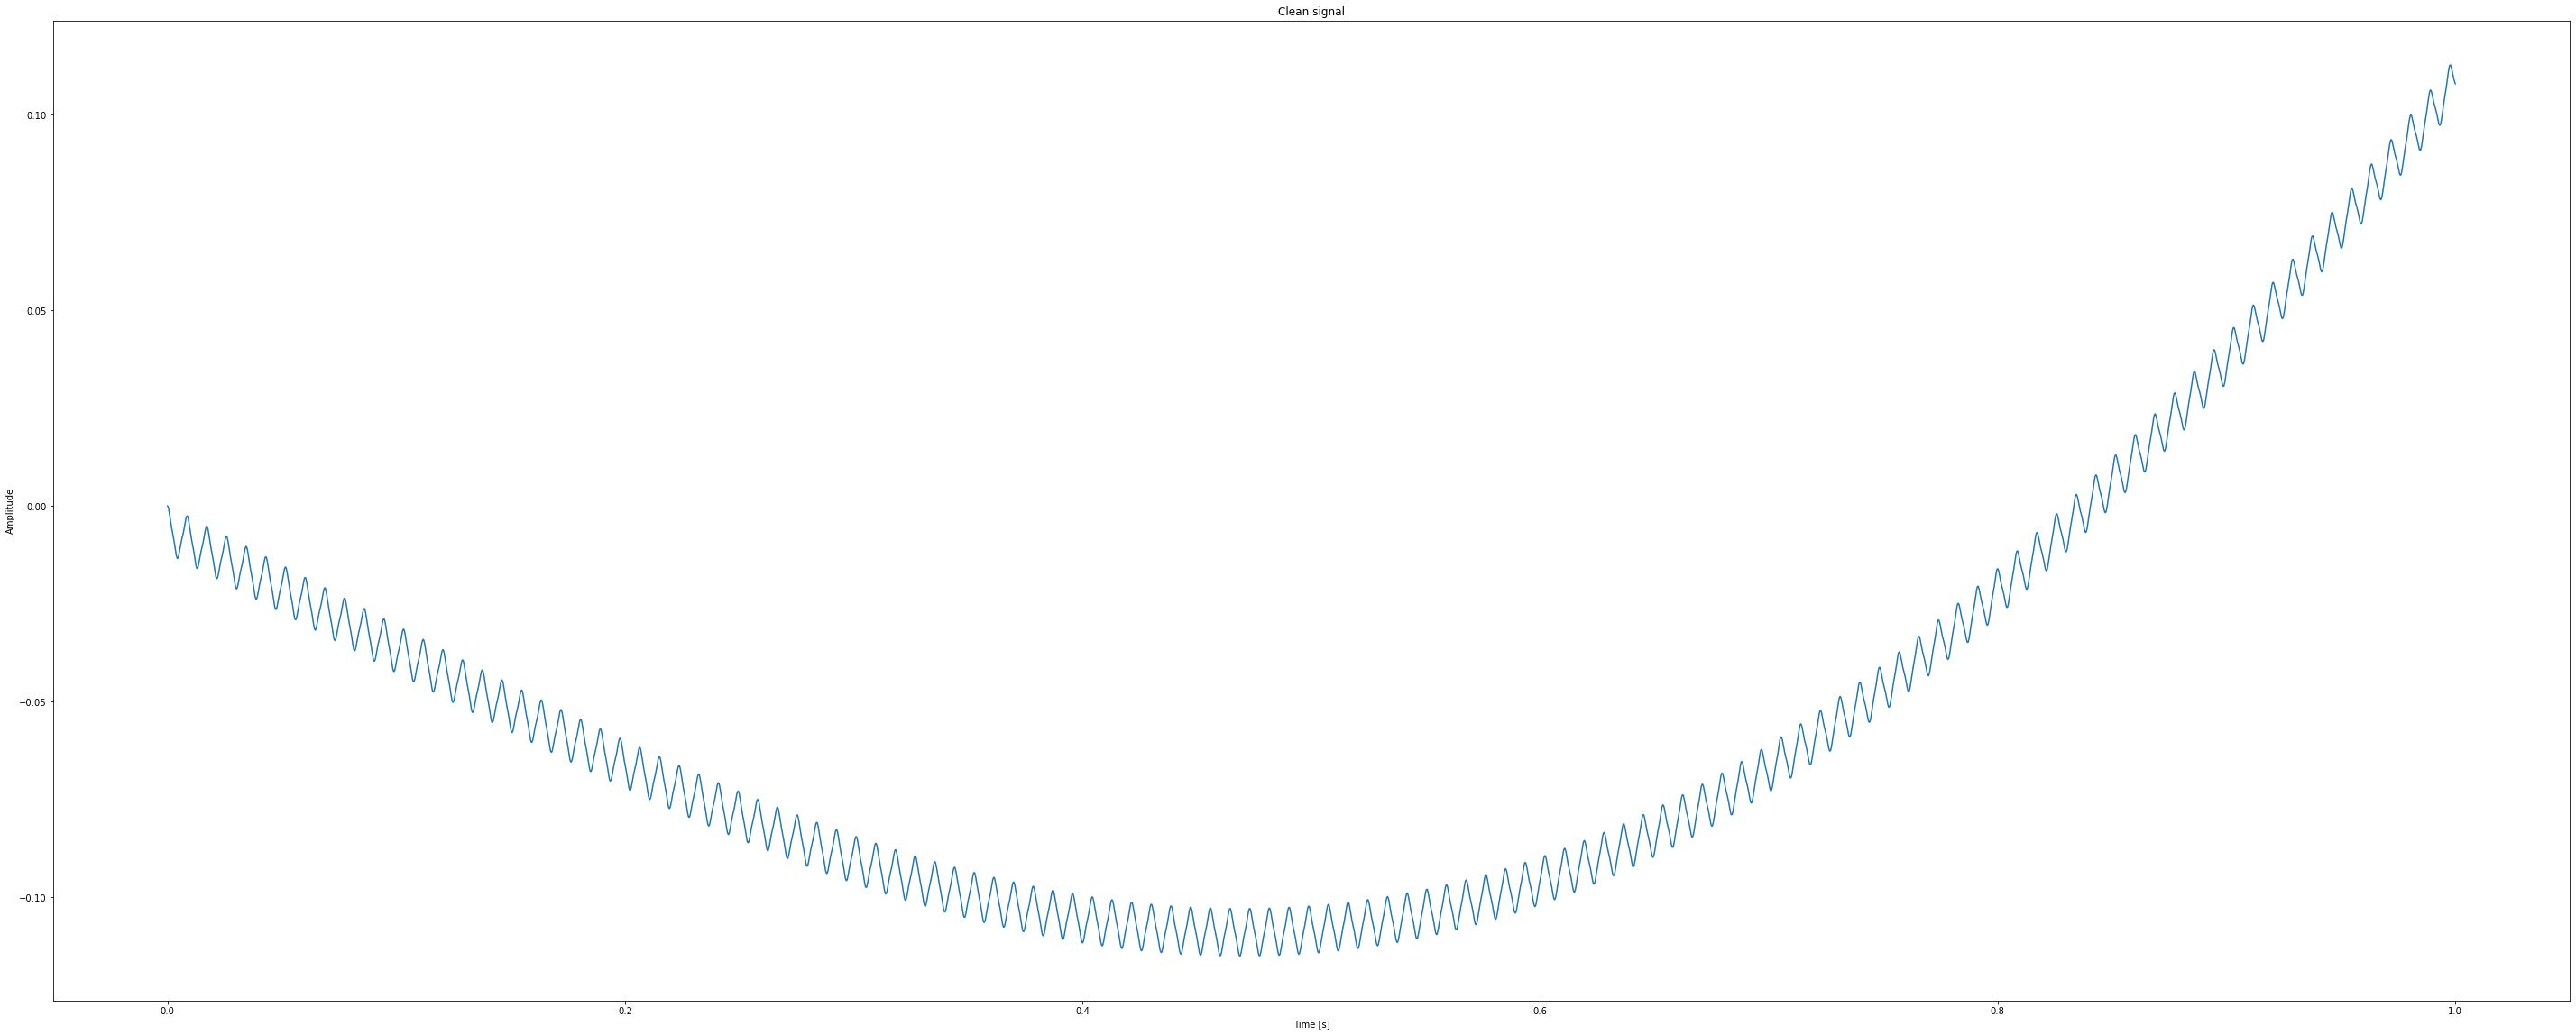

In [167]:
y = np.convolve(s_2 ,np.sinc((t_2)))
y = y[:10000]
#len
plt.figure(figsize=(50, 20))
plt.title("Clean signal")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t_3, y)

#plt.show()
len(y) +1

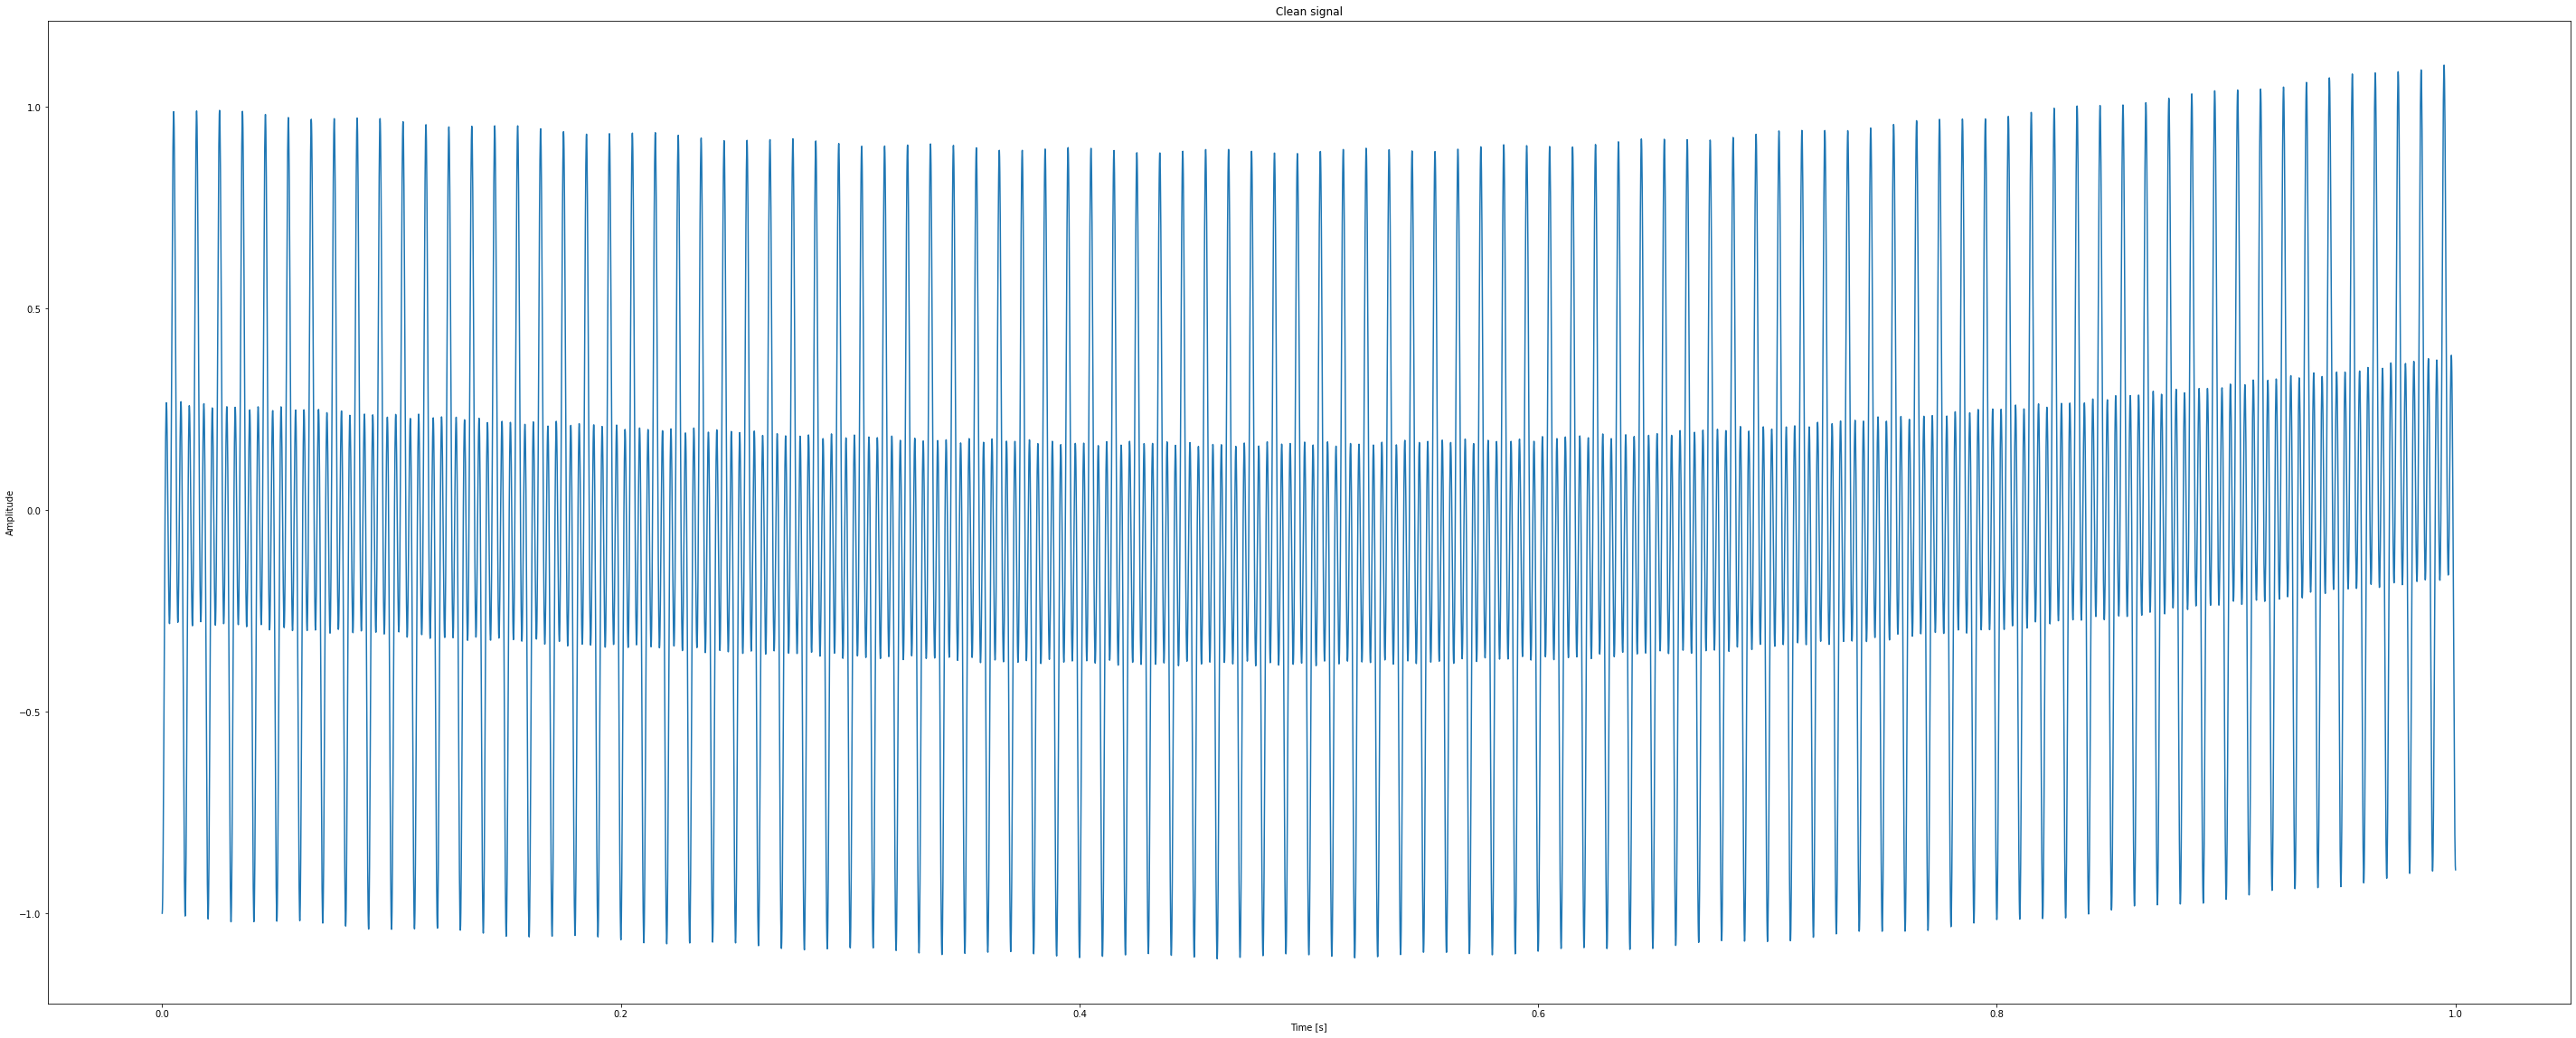

In [169]:
plt.figure(figsize=(50, 20))
plt.title("Clean signal")
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t_3, y - s_3)

In [172]:
#relative error
(np.abs(y-s_3) / s_3).mean()

0.0940787070840875